In [41]:
%pylab inline
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import zero_one_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing


Populating the interactive namespace from numpy and matplotlib


# Importación y procesamiento de datos

In [68]:
#data = pd.DataFrame(pd.read_csv("wine.data", header = None))
#data.columns = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
data = loadtxt("wine.data", delimiter = ",")
target = data[:,0]
scaled_data = preprocessing.scale(data) #Desviacion estandar = 1 y promedio = 0

Transormación de labels para hacer comparación adecuada

In [69]:
target -= 1
'''for n,i in enumerate(target):
    if i==2:
        target[n]=1
    elif i ==1:
        target[n] = 2
    else:
        target[n]  = 0'''
        

'for n,i in enumerate(target):\n    if i==2:\n        target[n]=1\n    elif i ==1:\n        target[n] = 2\n    else:\n        target[n]  = 0'

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_data, target)

#K-means clustering 

In [4]:
errors = np.zeros(10)
for i in range(1,11):
    fit_K  = KMeans(n_clusters = i).fit(scaled_data)
    errors[i-1] = fit_K.inertia_ 
   

El error en este caso se define como la distancia total que hay entre los todos los puntos y el centro del cluster más cercano 

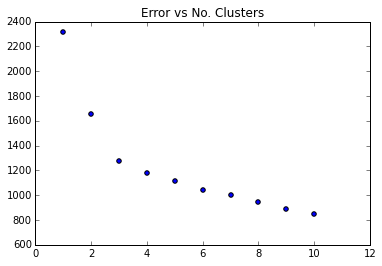

In [5]:
x = linspace(1, 10, 10)
scatter(x, errors)
title("Error vs No. Clusters")

Se puede ver que al llegar a tres clusters el error disminuye en menor medida cuando se aumenta el número de clusters. Es por esto que el número de clusters óptimo para esta caso sería tres.

In [71]:
km = KMeans(n_clusters = 3)
fit = km.fit(X_train, Y_train)
predict_km = km.predict(X_test) 
print zero_one_loss(predict_km, Y_test)
print predict_km, Y_test

0.777777777778
[2 2 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 2 1 0 1 0 1 0 2 2 2 1 1 1 0 2 0 0 0 0 1
 2 0 1 1 0 0 2 1] [ 2.  2.  1.  0.  1.  0.  0.  1.  0.  1.  1.  0.  1.  0.  1.  0.  1.  2.
  0.  1.  0.  1.  0.  1.  2.  2.  2.  0.  0.  0.  1.  2.  1.  1.  1.  1.
  0.  2.  1.  0.  0.  1.  1.  2.  0.]


**Revisar cómo cambiar los labels para hacer la comparación apropiada. En principio estaría clasificando bien la mayoría de puntos**

#PCA

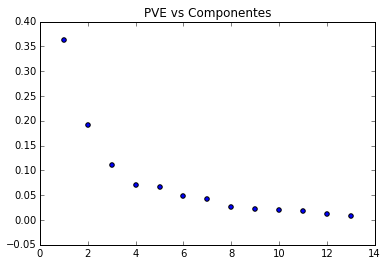

In [7]:
fit_PCA_test = PCA().fit(scaled_data)
PVE = fit_PCA_test.explained_variance_ratio_
scatter(range(1,14),PVE)
title("PVE vs Componentes")

Como se quiere explicar el 95% de la varianza, se puede ver en la gráfica que serán necesarias 4 componentes. Sin embargo, se puede ver que después de la tercera componente cada una de las componentes explica menos del 5%. Esto se observa en la forma en la que la gráfica tiende a saturarse después de la tercera componenente. Es por esto que el número óptimo de componentes sería tres.

In [8]:
fit_PCA = PCA(n_components = 3)
fit_PCA.fit(scaled_data)
PCA_result = fit_PCA.transform(scaled_data)

#Random Forest

In [14]:
n_trees_total = 50
m = 3 #Se toma como el numero de predictores como sqrt(p)
for i in range(n_trees_total):
    rf = RandomForestClassifier(n_estimators = 50, max_features =  m)
    rf.fit(X_train, Y_train)
    prediction = rf.predict(X_test)
    

**Revisar cómo transformar target correctamente para poder encontrar el número óptimo de árboles**